In [ ]:
# "./data/features_onehot.txt", "./data/labels.txt"
# (30162, 14) (15060, 14)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readfile_tolist(filename, sep):
    li = []
    with open(filename, encoding="utf-8") as f:
        for line in f:
            line_list = line.strip("\n").split(sep)
            line_list = [int(i) for i in line_list]
            if len(line_list) != 0:
                li.append(line_list)
    return li

In [3]:
features_list = np.array(readfile_tolist("./data/features_onehot.txt", ","))
labels_list = np.array(readfile_tolist("./data/labels.txt", ","))
print(features_list[0:2], labels_list[:2])

[[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
  1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0]] [[0]
 [0]]


In [4]:
print(len(features_list), len(labels_list),len(features_list[0]), len(labels_list[0]))

45222 45222 118 1


In [5]:
n_split = 30162
X_train = features_list[:n_split]
y_train = labels_list[:n_split]
X_test = features_list[n_split: ]
y_test = labels_list[n_split: ]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(30162, 118) (30162, 1) (15060, 118) (15060, 1)


In [6]:
X_train.dtype

dtype('int64')

In [7]:
from sklearn.linear_model import LogisticRegressionCV as LRCV

In [8]:
lrcv = LRCV(Cs=[1], penalty="l2",multi_class='auto', tol=0.0001, max_iter=500, cv=5, scoring="roc_auc")

In [9]:
lrcv.fit(X_train, y_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=[1], class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [10]:
scores = list(lrcv.scores_.values())[0] #  accu平均值

In [11]:
print(scores.mean(), scores.std())

0.889616551763155 0.00459955169962345


In [12]:
y_pred = lrcv.predict(X_test)

In [13]:
accu = accuracy_score(y_test, y_pred)
print("accu:", accu)

accu: 0.8349269588313413


In [14]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [15]:
y_score = lrcv.decision_function(X_test)

In [16]:
y_score

array([-6.07955209, -1.01143597, -0.35970821, ...,  1.48242023,
       -1.87376841,  1.44876169])

In [17]:
fpr, tpr, threshold = roc_curve(y_test, y_score) 
print(tpr)

[0.00000000e+00 2.70270270e-04 8.10810811e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [18]:
roc_auc = auc(fpr,tpr)

In [19]:
roc_auc

0.8877951084887705

In [20]:
precision, recall, _thresholds = precision_recall_curve(y_test, y_score)

In [21]:
print(recall)

[1.00000000e+00 9.99729730e-01 9.99729730e-01 ... 5.40540541e-04
 2.70270270e-04 0.00000000e+00]


In [22]:
def plot_roc_auc(model, X_test, y_test):
    pass

<Figure size 432x288 with 0 Axes>

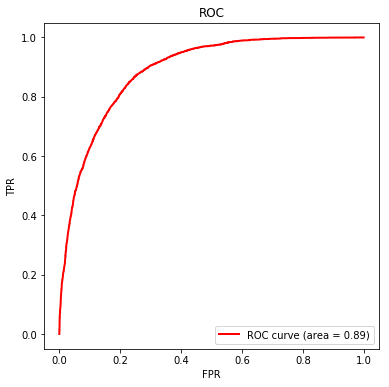

In [23]:
plt.figure()
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
# plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

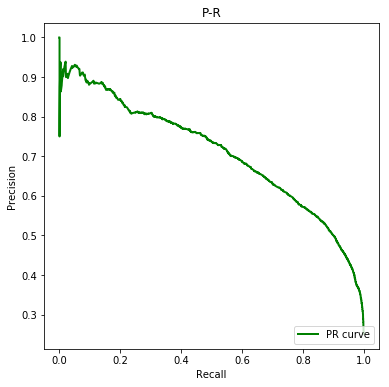

In [24]:
plt.figure()
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='green',
         lw=2, label='PR curve')  ###假正率为横坐标，真正率为纵坐标做曲线
# plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('P-R')
plt.legend(loc="lower right")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [31]:
"""
LRCV(
    Cs=10,
    fit_intercept=True,
    cv='warn',
    dual=False,
    penalty='l2',
    scoring=None,
    solver='lbfgs',
    tol=0.0001,
    max_iter=100,
    class_weight=None,
    n_jobs=None,
    verbose=0,
    refit=True,
    intercept_scaling=1.0,
    multi_class='warn',
    random_state=None,
    l1_ratios=None,
)
"""
params = {
    "Cs":[1, 3, 5, 7,  10,20,30],
    "max_iter": range(500,1500,100),
    "penalty":["l2"],
     "tol":[0.0001,0.0002, 0.0003,0.0004,0.0005],
    "l1_ratios":[0.001, 0.002, 0.0005]
}

def grid_search(model, param, X, y):
    grid = GridSearchCV(model, param_grid=param, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
    grid.fit(X, y)
#     print("BestParams:{} BestScore:{}".format(grid.best_params_, -grid.best_score_))
#     grid.cv_results_['mean_test_score'] = -grid.cv_results_['mean_test_score']
#     print(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'std_test_score']])
    print(grid.cv_results_, type(grid.cv_results_))

In [32]:
grid_search(LRCV(), params, X_train, y_train)

Fitting 5 folds for each of 1050 candidates, totalling 5250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 82.0min
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed: 121.3min
[Parallel(n_jobs=-1)]: Done 5250 out of 5250 | elapsed: 134.8min finished
/root/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1992: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  self.penalty))
/root/anaconda3/lib/python3.6

{'mean_fit_time': array([ 0.93178539,  0.96325002,  1.00108018, ..., 61.18952308,
       53.31753659, 47.1694387 ]), 'std_fit_time': array([0.10270535, 0.06547151, 0.06874391, ..., 1.85520594, 1.57174473,
       1.763745  ]), 'mean_score_time': array([0.01534085, 0.01452937, 0.0147378 , ..., 0.00710602, 0.00634565,
       0.00503387]), 'std_score_time': array([0.00529929, 0.00453054, 0.00428344, ..., 0.00028799, 0.00074169,
       0.00038055]), 'param_Cs': masked_array(data=[1, 1, 1, ..., 30, 30, 30],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_l1_ratios': masked_array(data=[0.001, 0.001, 0.001, ..., 0.0005, 0.0005, 0.0005],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_iter': masked_array(data=[500, 500, 500, ..., 1400, 1400, 1400],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
    